In [3]:
from konlpy.tag import Mecab
import numpy as np
import pandas as pd
import time
from tqdm import tqdm


time_sum = 0

t1 = time.time()

t2 = time.time()

time_sum += (t2 - t1)
print(time_sum)



data = pd.read_csv('./save_data/naver_review_puretext.csv')
mecab = Mecab("C:/mecab/mecab-ko-dic")

In [6]:
data['tokenized'] = data['review'].apply(mecab.morphs)

In [45]:
from gensim.models import FastText
#fast text 학습시간
time_sum = 0

t1 = time.time()
ft = FastText(data['tokenized'].to_list()[:200],window=5,min_count = 5,workers=4,sg=1)
t2 = time.time()

time_sum += (t2 - t1)
print(time_sum)


1.0020267963409424


In [55]:
from gensim.models import Word2Vec
#워드2벡터 학습시간
time_sum = 0

t1 = time.time()
model_only_reviewdata = Word2Vec(sentences= data['tokenized'].to_list()[:200], min_count=0,sg=1)
t2 = time.time()

time_sum += (t2 - t1)
print(time_sum)

0.11394500732421875


In [11]:
from gensim.models.keyedvectors import KeyedVectors
#pretrained fasttext 로드시간
time_sum = 0

t1 = time.time()
load_ft = FastText.load_fasttext_format('./wiki.ko.bin')
t2 = time.time()

time_sum += (t2 - t1)
print(time_sum)

C:\Users\max82\AppData\Local\Temp\ipykernel_19600\1515204556.py:6: DeprecationWarning: Call to deprecated `load_fasttext_format` (use load_facebook_vectors (to use pretrained embeddings) or load_facebook_model (to continue training with the loaded full model, more RAM) instead).
  load_ft = FastText.load_fasttext_format('./wiki.ko.bin')


80.95356869697571


In [12]:
print(model_only_reviewdata.wv.similarity('가격','가성비'))
print(ft.wv.similarity('가격','가성비'))
print(load_ft.wv.similarity('가격','가성비'))

0.6207822
0.62738055
0.33411


In [13]:
print(model_only_reviewdata.wv.most_similar('가격',topn=5))
print()
print(ft.wv.most_similar('가격',topn=5))
print()
print(load_ft.wv.most_similar('가격',topn=5))
print()

[('금액', 0.7892986536026001), ('가격대', 0.7320163249969482), ('값', 0.7069447040557861), ('퀄', 0.7005999684333801), ('기격', 0.6948007941246033)]

[('금액', 0.796396017074585), ('가격대', 0.7802681922912598), ('값', 0.6921350359916687), ('품질', 0.6810470819473267), ('퀄', 0.6474273204803467)]

[('가격의', 0.8348550796508789), ('가격과', 0.8136048913002014), ('시장가격', 0.8029099106788635), ('가격인', 0.7977956533432007), ('가격표', 0.7931158542633057)]



In [38]:
words = data['tokenized'][:500]

In [52]:
cnt = 0
for wds in tqdm(words):
        for word in wds:
            cnt += 1
print(cnt)

100%|█████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 81846.47it/s]

9931


In [53]:
#소요시간 비교

def wv_calc_sim_time(wv, word_data):
    time_sum = 0
    cnt = 0
    for words in tqdm(word_data):
        for word in words:
            if word in wv:
                t1 = time.time()
                wv.similarity('가격',word)
                t2 = time.time()

                time_sum += (t2 - t1)
            else:
                cnt+=1
    print(cnt)

    return time_sum

def wv_get_sim_rank_time(wv, words):
    time_sum = 0
    for words in tqdm(words):
        for word in words:
            if word in wv:
                t1 = time.time()
                wv.most_similar(word,topn=5)
                t2 = time.time()

                time_sum += (t2 - t1)

    return time_sum

In [56]:
time_list = []
for wv in [model_only_reviewdata.wv, ft.wv, load_ft.wv]:
    time_list.append(wv_calc_sim_time(wv,words))

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 3357.60it/s]


에어
씩
네여
편해
매일
소갈
비탕
제육
고기
갈비탕
덜
밥
비벼
끼
무늬
면서
옷
염
거래처
간식
우산
우산
접
체결
뻑뻑
상
품평
샀으나
액체
쏙
병
모양
씹
인제
씹
쯤
재미
갈려고
해도
비싸
~^^;;;
교체
그러나
비슷
젓가락
낫
템
빨대
그러
빠
룬
전체
바디
끈적끈적
옷
옷걸이
서로
막
달라붙
옷걸이
랄까
여요
예민
때렸
느
립니
오전
이전
해야
당일
발송
욜
오전
8
반
쯤
화
욜
송속
관계없
문제
니까요
특상
중간
종이컵
쏙
프레임
디자인
인터넷
비교
해도
저상
더라고요
걸린
그닥
어용
마리
마리
쪼그마
몰
닌깐
리본
묶
을라고
봣더니
리본
당겨
의사
분무기
새
원래
그래요
문의
외관
케이
스랑
치약
쓴
첫
쓴맛
써서
곱창
냄새
양념
꼼꼼
분무기
윗
어는
유액
종이
조각
바랜
밑그림
good
good
앏지
질겨
부채살
훨씬
낳
입자
와요
양치
후
개운
무겁
마스크
분말
양치질
사탕
열
굵
머리통
아라
구워
자르
순간
표면
까맣
변했
굽
속
까매진
단맛
쓴
속상하
그
결과
레벨
기우뚱
거려
면서
볶음
예정
삐그덕
심해
동봉
된
윤활유
마세요
운동
신경
쓰여서
못합니다
편의점
걸로
직접
검색
벌써
그러
,.,^^
질리
카르
티
닌
덕분
땀
잘나
리
챔
털
빠집니다
세탁
털
세탁물
기겁
는다
가운데
장거리
다녀오
면서
착용
움직이
버클
아래
면서
가슴
쪽
줄
감싸
가까운
거리
조개
내용물
맞춰서
부위
티
부위
지방
줄
특히나
제조
일자
개월
된
나쁩니다
고들빼기
깻잎
깻잎
좋아하
비슷
귀차
요청
합니다만
다신
이러
으시
붓기
빧아요
얼려
쏠리
힘
아리
신맛
친지
된
산거
버려야
빠짐
빠짐
심합니다
실
보프
라기
심해서
한참
제게
중간중간
올
플
림
드라이브
정전기
쳐도
정전기
심한
만지
따닥
따다닥
거리
들러붙
옷
네여
세탁
후
이러
어찌
보입니다
연습
바이올린
몰라서
유튜브
영상
송진
법
튜닝
법
검색
송진
여분
줄
바이올린
거치대
!!
열전달
괴
주의
셔요
남편
줬
벗겨졌
필터
마크
괜찬습니다
빨랐
이쁜데
갓
신경
앙고라
털
빠져요
옷
나와요
아

100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 2890.20it/s]


0


100%|██████████████████████████████████████████████████████████████████████████████| 500/500 [00:00<00:00, 2824.86it/s]

0


In [40]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

tagger = ['w2v', 'fast_text', 'load_ft']

Text(0, 0.5, 'total seconds')

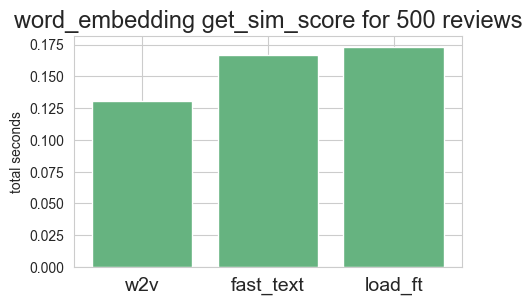

In [48]:
plt.figure(figsize=(5,3))
plt.bar(tagger, time_list, color=(0.4,0.7,0.5))
plt.title('word_embedding get_sim_score for 500 reviews', fontsize=17)
plt.xticks(fontsize=14)
plt.ylabel('total seconds')

In [19]:
time_list=[]
words = data['tokenized'][:500]
for wv in [model_only_reviewdata.wv,ft.wv, load_ft.wv]:
    time_list.append(wv_get_sim_rank_time(wv,words))

100%|████████████████████████████████████████████████████████████████████████████████| 500/500 [12:44<00:00,  1.53s/it]


In [22]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')

tagger = ['w2v','fast_text', 'load_ft']

Text(0, 0.5, 'total seconds')

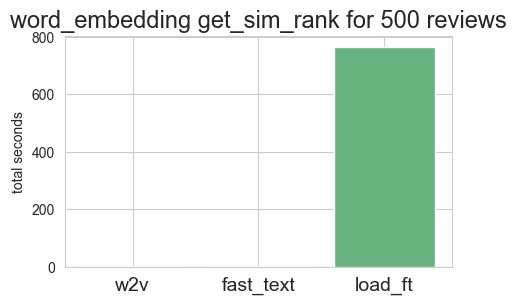

In [23]:
plt.figure(figsize=(5,3))
plt.bar(tagger, time_list, color=(0.4,0.7,0.5))
plt.title('word_embedding get_sim_rank for 500 reviews', fontsize=17)
plt.xticks(fontsize=14)
plt.ylabel('total seconds')